In [87]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from plotly.offline import iplot
import cufflinks

terror=pd.read_csv('/home/bo/amr_ws/eda/data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

/tmp/ipykernel_13280/1357924224.py:9: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [88]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [89]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)


Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


/tmp/ipykernel_13280/2185080460.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




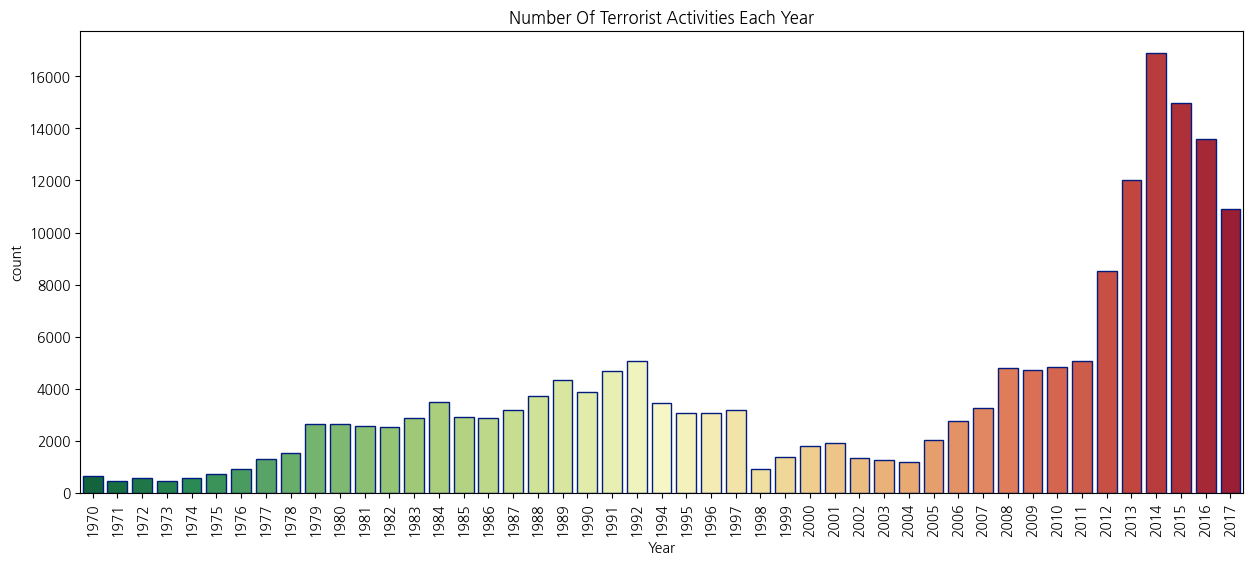

In [90]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

/tmp/ipykernel_13280/4102545332.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




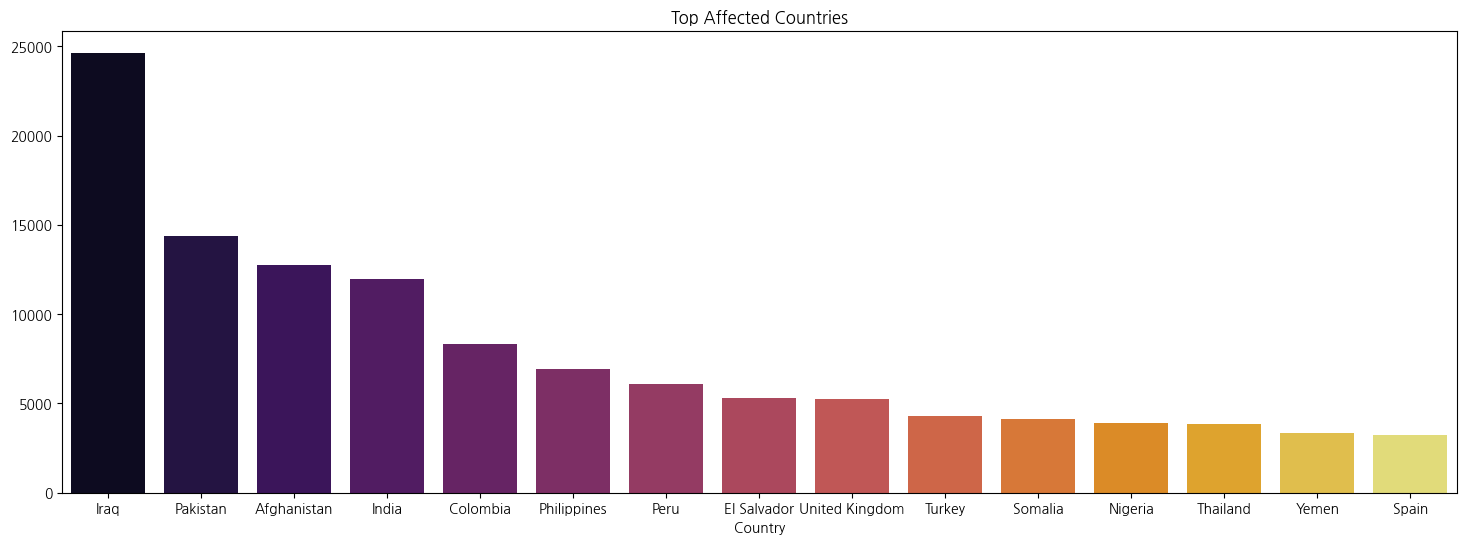

In [91]:
plt.subplots(figsize=(18,6))
sns.barplot(x=terror['Country'].value_counts()[:15].index,y=terror['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

In [92]:

year_=[]
for Year in terror["Year"]:
    if Year<2012:    
        year_.append("before")
    else:
        year_.append("after")



In [93]:
year_

['before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',
 'before',

In [94]:
terror["when"]=year_

In [183]:
attacktype_index=terror['AttackType'].value_counts()[1:15].index
attacktype_values=terror['AttackType'].value_counts()[1:15].values
Killed_index=terror['Killed'].value_counts()[1:15].index
Killed_values=terror['Killed'].value_counts()[1:15].values
attacktype_index

/tmp/ipykernel_13280/3181397431.py:3: FutureWarning:

The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead

/tmp/ipykernel_13280/3181397431.py:4: FutureWarning:

The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead



Index(['Armed Assault', 'Assassination', 'Hostage Taking (Kidnapping)',
       'Facility/Infrastructure Attack', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)', 'Hijacking'],
      dtype='object', name='AttackType')

In [96]:
attacktype_values,attacktype_index,Killed_index,Killed_values

(array([42669, 19312, 11158, 10356,  7276,  1015,   991,   659]),
 Index(['Armed Assault', 'Assassination', 'Hostage Taking (Kidnapping)',
        'Facility/Infrastructure Attack', 'Unknown', 'Unarmed Assault',
        'Hostage Taking (Barricade Incident)', 'Hijacking'],
       dtype='object', name='AttackType'),
 Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 9.0, 11.0, 12.0, 13.0,
        15.0],
       dtype='float64', name='Killed'),
 array([36576, 14147,  7738,  4961,  3565,  2552,  1960,  1495,  1192,
         1054,   833,   747,   575,   556]))

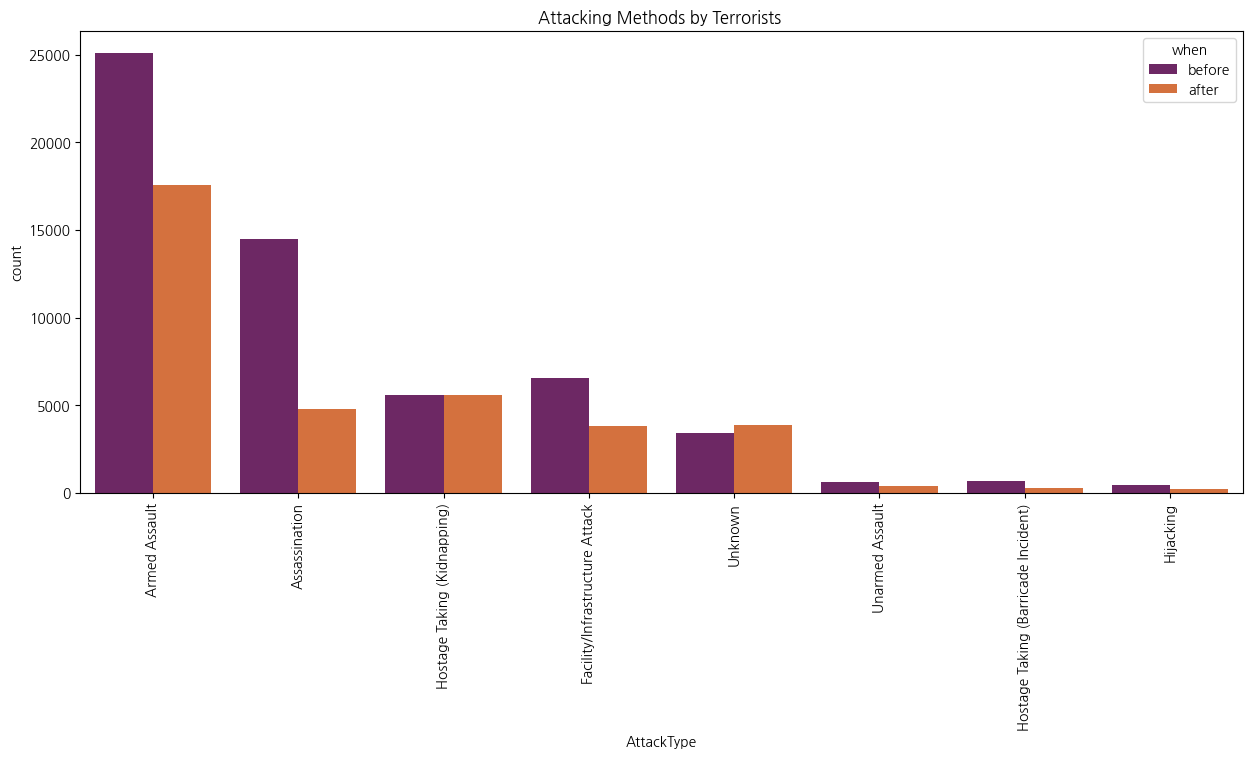

In [97]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AttackType',data=terror,palette='inferno',hue="when",order=terror['AttackType'].value_counts()[1:15].index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists ')
plt.show()


/tmp/ipykernel_13280/3153694135.py:3: FutureWarning:

The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead



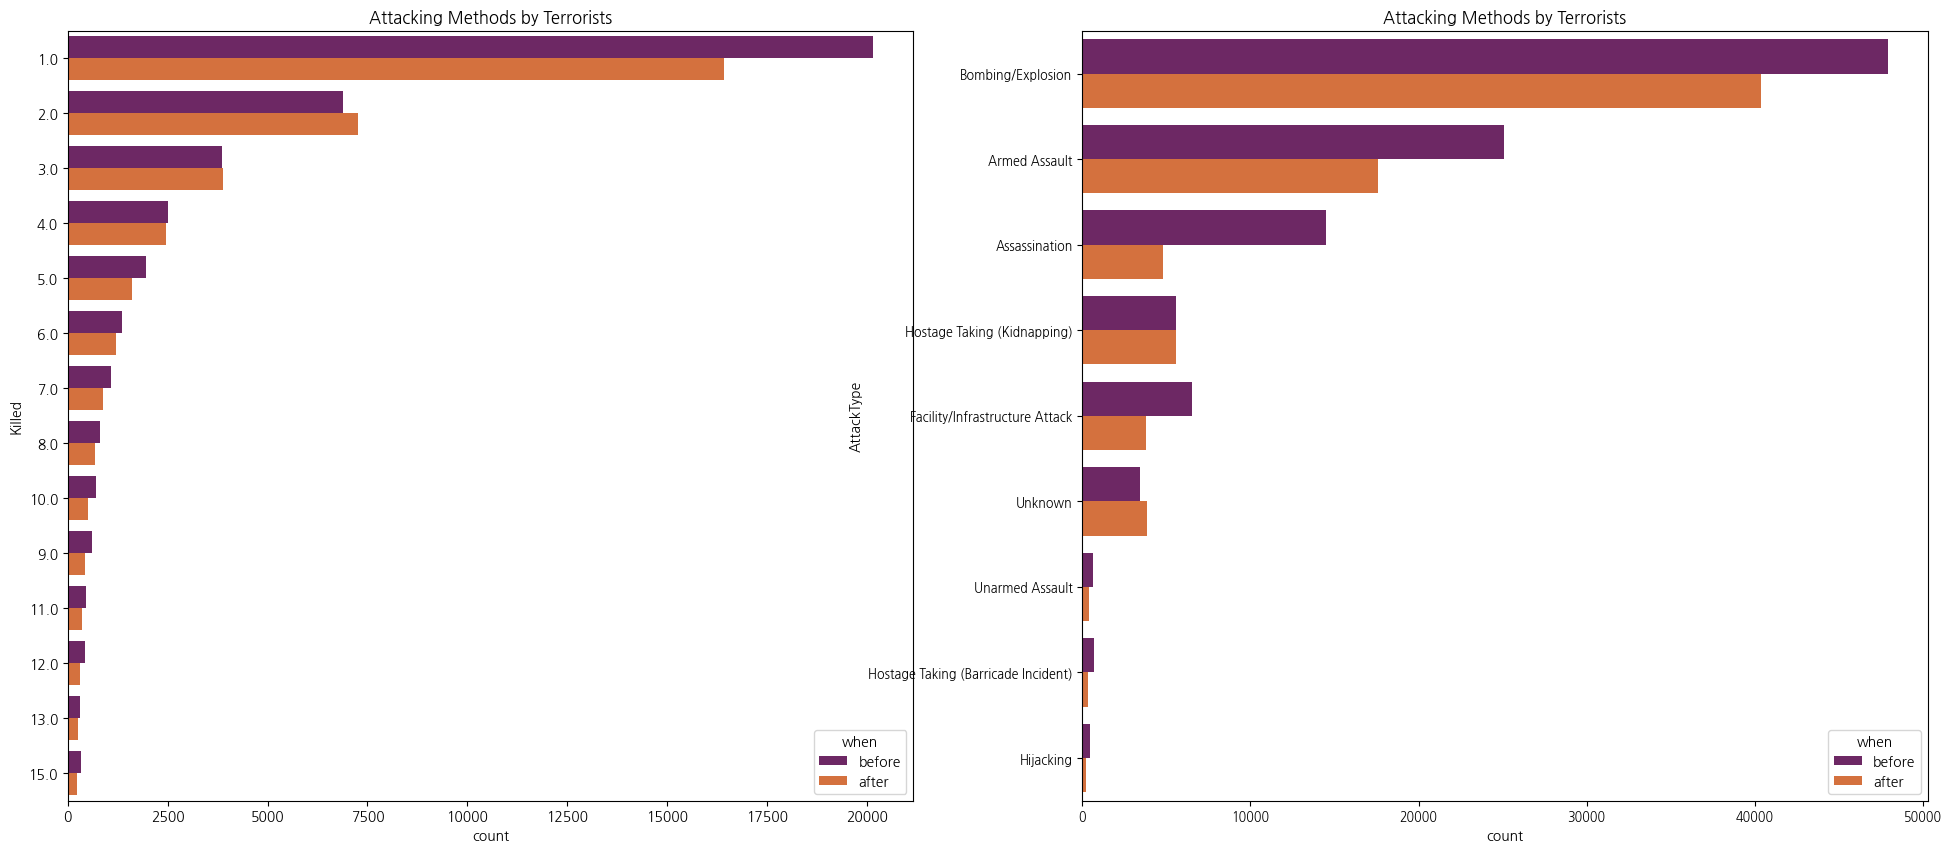

In [98]:
f, ax=plt.subplots(1,2,figsize=(24,10))

sns.countplot(y="Killed",data=terror,palette='inferno',hue="when",order=terror['Killed'].value_counts()[1:15].index,ax=ax[0])
ax[0].set_title('Attacking Methods by Terrorists')
sns.countplot(y='AttackType',data=terror,palette='inferno',hue="when",order=terror['AttackType'].value_counts().index,ax=ax[1])
ax[1].set_title('Attacking Methods by Terrorists')
ax[1].tick_params(labelsize=9)
plt.show()


In [99]:
terror.fillna(0, inplace=True)
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities,when
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,0,MANO-D,Private Citizens & Property,Unknown,0,1.0,before
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",0,23rd of September Communist League,Government (Diplomatic),Unknown,0,0.0,before
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,0,Unknown,Journalists & Media,Unknown,0,1.0,before
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,0,Unknown,Government (Diplomatic),Explosives,0,0.0,before
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,0,Unknown,Government (Diplomatic),Incendiary,0,0.0,before


In [100]:
terror_WesternEurope=terror[terror["Region"]== "Western Europe"]
terror_SouthAmerica=terror[terror["Region"]== "South America"]
terror_MiddleEastNorthAfrica=terror[terror["Region"]== "Middle East & North Africa"]
terror_SoutheastAsia=terror[terror["Region"]== "Southeast Asia"]
#Western Europe, South America, Middle East& North Africa, Southeast Asia

In [158]:

e_year_list=list(terror_WesternEurope['Year'].unique())
e_totalKilled=[]
e_totalWounded = []
am_year_list=list(terror_SouthAmerica['Year'].unique())
am_totalKilled=[]
am_totalWounded = []
af_year_list=list(terror_MiddleEastNorthAfrica['Year'].unique())
af_totalKilled=[]
af_totalWounded = []
as_year_list=list(terror_SoutheastAsia['Year'].unique())
as_totalKilled=[]
as_totalWounded = []


In [159]:
for i in e_year_list:
    x = terror_WesternEurope[terror_WesternEurope['Year'] == i]
    e_TotalKilled = x.Killed.sum()    
    e_totalKilled.append(e_TotalKilled)    
    e_TotalWounded = x.Wounded.sum()    
    e_totalWounded.append(e_TotalWounded)
for i in am_year_list:
    x = terror_SouthAmerica[terror_SouthAmerica['Year'] == i]
    am_TotalKilled = x.Killed.sum()    
    am_totalKilled.append(am_TotalKilled)    
    am_TotalWounded = x.Wounded.sum()    
    am_totalWounded.append(am_TotalWounded)
for i in af_year_list:
    x = terror_MiddleEastNorthAfrica[terror_MiddleEastNorthAfrica['Year'] == i]
    af_TotalKilled = x.Killed.sum()    
    af_totalKilled.append(af_TotalKilled)    
    af_TotalWounded = x.Wounded.sum()    
    af_totalWounded.append(af_TotalWounded)
for i in as_year_list:
    x = terror_SoutheastAsia[terror_SoutheastAsia['Year'] == i]
    as_TotalKilled = x.Killed.sum()    
    as_totalKilled.append(as_TotalKilled)    
    as_TotalWounded = x.Wounded.sum()    
    as_totalWounded.append(as_TotalWounded)
    




In [160]:
WesternEurope_killed_wounded = pd.DataFrame({'year': e_year_list, 'killed': e_totalKilled, 'wounded':e_totalWounded})
WesternEurope_killed_wounded.sort_values(by='year',inplace=True)
SouthAmerica_killed_wounded = pd.DataFrame({'year': am_year_list, 'killed': am_totalKilled, 'wounded':am_totalWounded})
SouthAmerica_killed_wounded.sort_values(by='year',inplace=True)
MiddleEastNorthAfrica_killed_wounded = pd.DataFrame({'year': af_year_list, 'killed': af_totalKilled, 'wounded':af_totalWounded})
MiddleEastNorthAfrica_killed_wounded.sort_values(by='year',inplace=True)
SoutheastAsia_killed_wounded = pd.DataFrame({'year': as_year_list, 'killed': as_totalKilled, 'wounded':as_totalWounded})
SoutheastAsia_killed_wounded.sort_values(by='year',inplace=True)
SoutheastAsia_killed_wounded.head()


,year,killed,wounded
0,1970,41.0,13.0
1,1971,2.0,10.0
2,1972,84.0,1.0
3,1973,0.0,8.0
4,1974,5.0,0.0


In [161]:
WesternEurope_killed_wounded.fillna(0.0, inplace=True)
SouthAmerica_killed_wounded.fillna(0.0, inplace=True)
MiddleEastNorthAfrica_killed_wounded.fillna(0.0, inplace=True)
SoutheastAsia_killed_wounded.fillna(0.0, inplace=True)
SouthAmerica_killed_wounded.head()


,year,killed,wounded
0,1970,11.0,4.0
1,1971,6.0,0.0
2,1972,6.0,1.0
3,1973,16.0,19.0
4,1974,21.0,29.0


In [173]:
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = WesternEurope_killed_wounded.year,
                    y = WesternEurope_killed_wounded.killed,
                    mode = "lines",
                    name = "Killed(W Europe)",
                    marker = dict(color = 'rgba(244,67,54, 0.8)'),
                    text= WesternEurope_killed_wounded.killed)
trace2 = go.Scatter(
                    x = WesternEurope_killed_wounded.year,
                    y =WesternEurope_killed_wounded.wounded,
                    mode = "lines",
                    name = "Wounded(W Europe)",
                    marker = dict(color = 'rgba(255,185,185, 0.8)'),
                    text= WesternEurope_killed_wounded.wounded)
trace3 = go.Scatter(
                    x = SouthAmerica_killed_wounded.year,
                    y = SouthAmerica_killed_wounded.killed,
                    mode = "lines",
                    name = "Killed(S America)",
                    marker = dict(color = 'rgba(255,152,0, 0.8)'),
                    text= SouthAmerica_killed_wounded.killed)
trace4= go.Scatter(
                    x = SouthAmerica_killed_wounded.year,
                    y = SouthAmerica_killed_wounded.wounded,
                    mode = "lines",
                    name = "Wounded(S America)",
                    marker = dict(color = 'rgba(255,219,179, 0.8)'),
                    text= SouthAmerica_killed_wounded.wounded)
trace5 = go.Scatter(
                    x = MiddleEastNorthAfrica_killed_wounded.year,
                    y = MiddleEastNorthAfrica_killed_wounded.killed,
                    mode = "lines",
                    name = "Killed(MEN Africa)",
                    marker = dict(color = 'rgba(139,195,74, 0.8)'),
                    text= MiddleEastNorthAfrica_killed_wounded.killed)
trace6 = go.Scatter(
                    x = MiddleEastNorthAfrica_killed_wounded.year,
                    y =MiddleEastNorthAfrica_killed_wounded.wounded,
                    mode = "lines",
                    name = "Wounded(MEN Africa)",
                    marker = dict(color = 'rgba(225,255,219, 0.8)'),
                    text= MiddleEastNorthAfrica_killed_wounded.wounded)
trace7 = go.Scatter(
                    x = SoutheastAsia_killed_wounded.year,
                    y = SoutheastAsia_killed_wounded.killed,
                    mode = "lines",
                    name = "Killed(SE Asia)",
                    marker = dict(color = 'rgba(0,212,206, 0.8)'),
                    text= SoutheastAsia_killed_wounded.killed)
trace8= go.Scatter(
                    x = SoutheastAsia_killed_wounded.year,
                    y = SoutheastAsia_killed_wounded.wounded,
                    mode = "lines",
                    name = "Wounded(SE Asia)",
                    marker = dict(color = 'rgba(204,249,255, 0.8)'),
                    text= SoutheastAsia_killed_wounded.wounded)
data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8]
layout = dict(title = 'KILLED , WOUNDED',
            xaxis= dict(title= 'Year',ticklen= 15,zeroline= True),
            height=1000,width=1800)
fig = dict(data = data, layout = layout)
iplot(fig)


In [175]:
#gpt로 줄여본거 ..
import plotly.graph_objs as go
from plotly.offline import iplot

def process_data(region_df):
    year_list = list(region_df['Year'].unique())
    total_killed = []
    total_wounded = []

    for year in year_list:
        subset = region_df[region_df['Year'] == year]
        total_killed.append(subset['Killed'].sum())
        total_wounded.append(subset['Wounded'].sum())

    result_df = pd.DataFrame({'year': year_list, 'killed': total_killed, 'wounded': total_wounded})
    result_df.sort_values(by='year', inplace=True)
    result_df.fillna(0.0, inplace=True)

    return result_df

# Process data for each region
WesternEurope_killed_wounded = process_data(terror_WesternEurope)
SouthAmerica_killed_wounded = process_data(terror_SouthAmerica)
MiddleEastNorthAfrica_killed_wounded = process_data(terror_MiddleEastNorthAfrica)
SoutheastAsia_killed_wounded = process_data(terror_SoutheastAsia)

# Create traces
traces = []
regions = ['W Europe', 'S America', 'MEN Africa', 'SE Asia']
colors1 = ['rgba(244,67,54, 0.8)', 'rgba(255,152,0, 0.8)', 'rgba(139,195,74, 0.8)', 'rgba(0,212,206, 0.8)']
colors2=['rgba(255,185,185, 0.8)','rgba(255,219,179, 0.8)','rgba(225,255,219, 0.8)','rgba(204,249,255, 0.8)']

for i, region_df in enumerate([WesternEurope_killed_wounded, SouthAmerica_killed_wounded, MiddleEastNorthAfrica_killed_wounded, SoutheastAsia_killed_wounded]):
    traces.append(go.Scatter(
        x=region_df['year'],
        y=region_df['killed'],
        mode="lines",
        name=f"Killed({regions[i]})",
        marker=dict(color=colors1[i]),
        text=region_df['killed']
    ))
    traces.append(go.Scatter(
        x=region_df['year'],
        y=region_df['wounded'],
        mode="lines",
        name=f"Wounded({regions[i]})",
        marker=dict(color=colors2[i]),
        text=region_df['wounded']
    ))

# Create layout
layout = dict(title='KILLED , WOUNDED',
            xaxis=dict(title='Year', ticklen=15, zeroline=True),
            height=1000, width=1800)

# Create figure and plot
fig = dict(data=traces, layout=layout)
iplot(fig)


In [187]:
attacktype_list=list(terror['AttackType'].unique())
europe_attacktype=0
for i in attacktype_list:
    if terror[terror["AttackType"]==i]:
    europe_attacktype=+1
europe_attacktype
    

0

In [179]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(14,6))
europe=terror[terror['Region']=='WesternEurope']
southamerica=terror[terror['sex']=='South America']

ax=sns.distplot(europe[europe['survived']==1]['age'],#distplot은 그냥 아래형태 그래프. 추세선원하면 kde=True
                label='survived', ax=axes[0], kde=True)
ax=sns.distplot(southamerica[southamerica['survived']==0]['age'], bins=40,
                label='not_survived', ax=axes[0], kde=True)
ax.legend(); ax.set_title('Female')
ax=sns.distplot(men[men['survived']==1]['age'], bins=18,
                label='survived', ax=axes[1], kde=False)
ax=sns.distplot(men[men['survived']==0]['age'], bins=40,
                label='not_survived', ax=axes[1], kde=False)
ax.legend(); ax.set_title('Male')


<bound method Series.notnull of 0         False
1         False
2         False
3         False
4         False
          ...  
181686    False
181687    False
181688    False
181689    False
181690    False
Name: Region, Length: 181691, dtype: bool>